**Movie Dataset Project**

**By: Ivan Yu**

**Goal (Defining the problem): This project is going to focus on finding information in a movies data set,
where we try to extract meaningful data and hidden meanings/correlations/causations behind trends.**


**Source of data set: https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset/code?datasetId=7181&sortBy=voteCount**

In [86]:
import pandas as pd

In [88]:
df = pd.read_csv("movie_metadata.csv")
df.head()

#2. Data Collection and Preparation

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [90]:
# Let's see if there's any correlation between gross and budget of the movie
# 3. Data Exploration and Analysis
import matplotlib.pyplot as plt

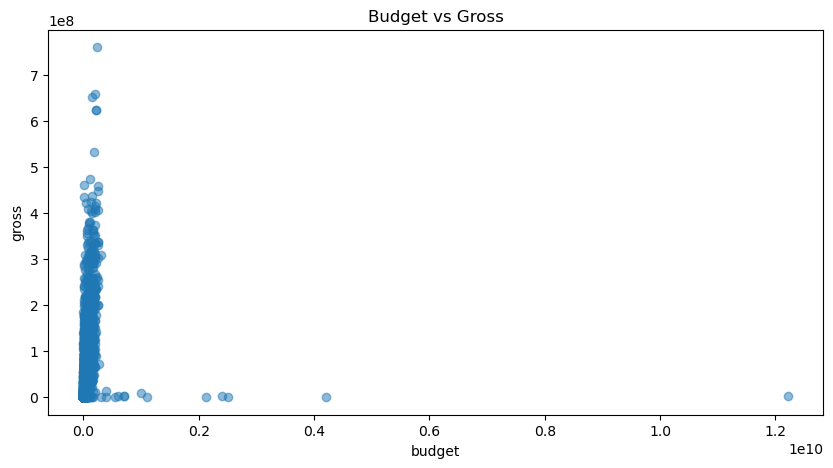

In [92]:
plt.figure(figsize=(10,5))
plt.scatter(df['budget'], df['gross'], alpha=0.5)
plt.xlabel("budget")
plt.ylabel("gross")
plt.title("Budget vs Gross")
plt.show()
# low correlation

**We can see that just because a movie has a higher budget, it does not mean that the gross will be higher**

**Let's clean the table a little bit, dropping rows with missing data**

In [96]:
df = df.dropna(subset=["budget", "gross"]) #Drops the rows with missing values
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


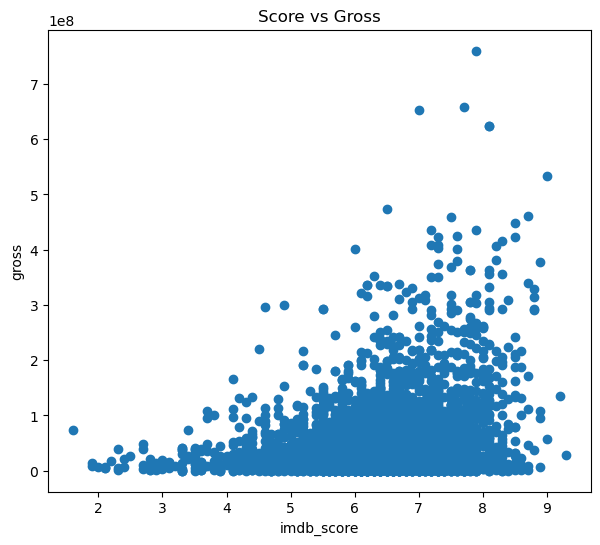

In [98]:
# Taking a look at any correlation between score and gross
plt.figure(figsize=(7,6))
plt.scatter(df['imdb_score'],df['gross'], alpha=1)
plt.xlabel('imdb_score')
plt.ylabel('gross')
plt.title("Score vs Gross")
plt.show()
#Correlation found! 

**Nice! It looks like there is a positive correlation between the score the movie recieved and the gross!**

**Let's use one more graph for data exploration**

In [102]:
df["Profit"] = df["gross"] - df["budget"]

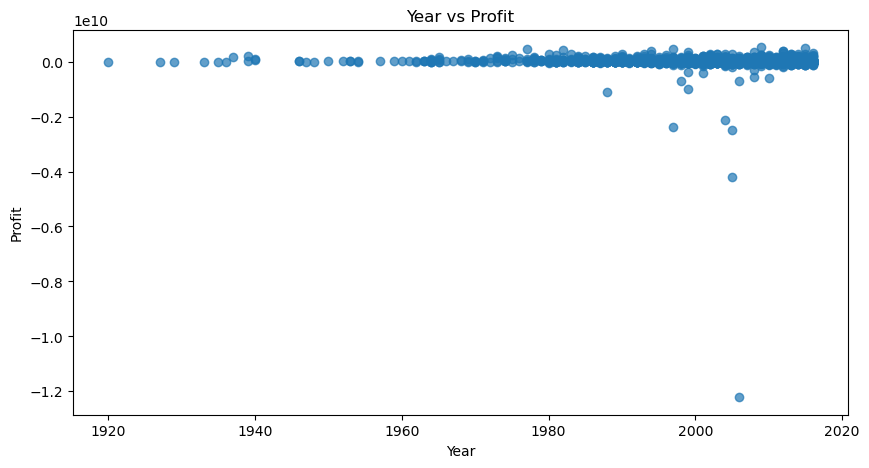

In [104]:
plt.figure(figsize=(10,5))
plt.scatter(df['title_year'], df["Profit"], alpha = 0.7)
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Year vs Profit")
plt.show()

**Wow! How interesting. So according to this data, movies were struggling to even break even up until around the year 2000, where profits really started to shine. There are some outliers to this assumption though for sure!**

In [107]:
import numpy as np
df.sort_values("Profit", ascending=False).head(1) #The outlier

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0


**For the data exploration chapter, we notice that movies struggle to break even, but since then has done better starting around the year 2000.
We also noticed that just because a movie has a high budget does not correlate with high gross.
And finally, we found out there is in fact a POSITIVE correlation between movie gross and score.**

In [110]:
df.head(1) #Just to take a look at the columns to find more correlations

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0


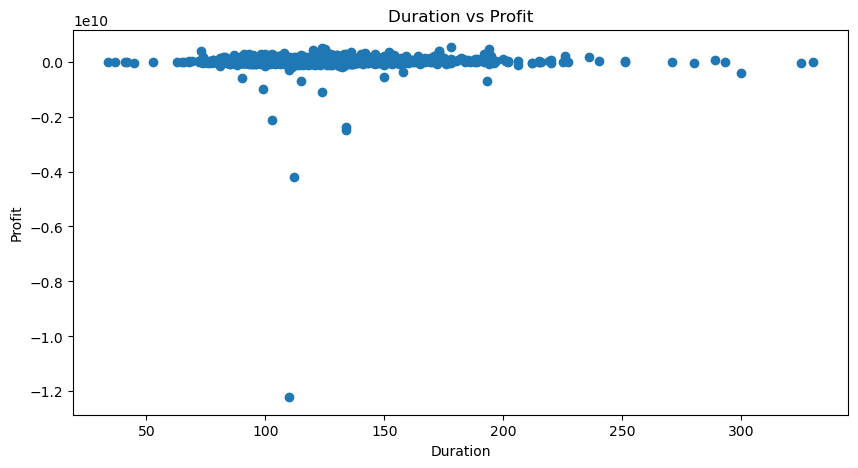

In [112]:
plt.figure(figsize=(10,5))
plt.scatter(df['duration'], df['Profit'])
plt.xlabel('Duration')
plt.ylabel('Profit')
plt.title('Duration vs Profit')
plt.show()

**Not Much correlation here**

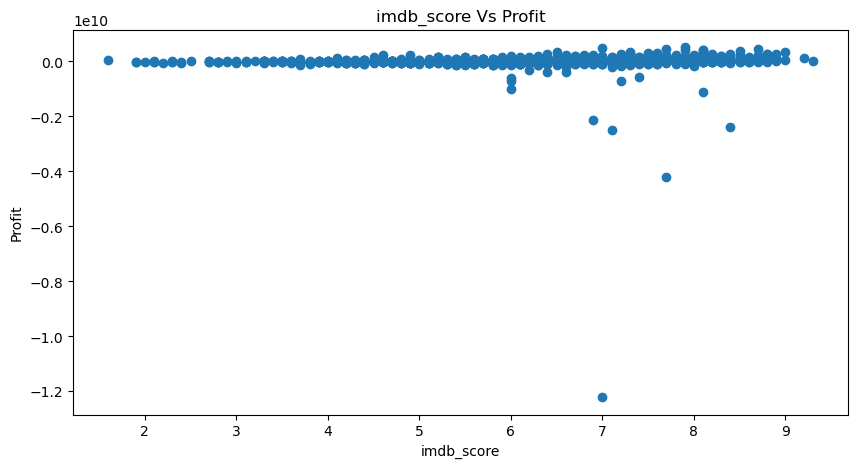

In [115]:
plt.figure(figsize=(10,5))
plt.scatter(df['imdb_score'],df['Profit'])
plt.xlabel('imdb_score')
plt.ylabel('Profit')
plt.title('imdb_score Vs Profit')
plt.show()

**Again, not much correlation here**

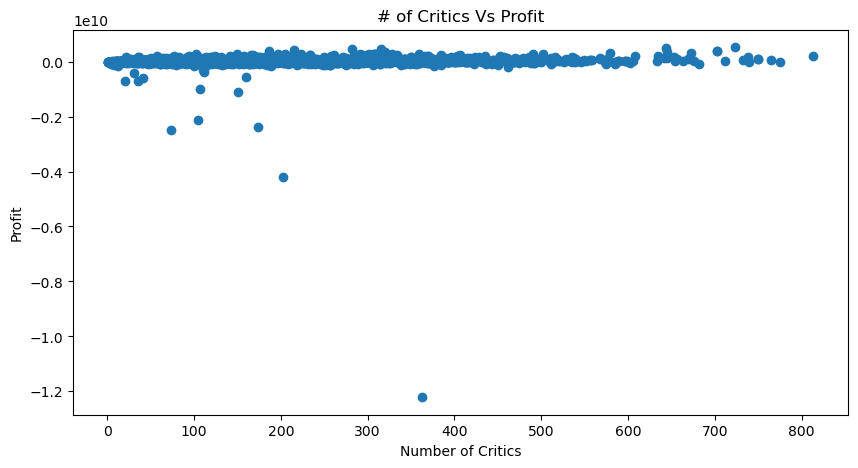

In [118]:
plt.figure(figsize=(10,5))
plt.scatter(df['num_critic_for_reviews'],df['Profit'])
plt.xlabel('Number of Critics')
plt.ylabel('Profit')
plt.title('# of Critics Vs Profit')
plt.show()

In [40]:
df.shape

(3891, 29)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3891 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3889 non-null   object 
 1   director_name              3891 non-null   object 
 2   num_critic_for_reviews     3890 non-null   float64
 3   duration                   3890 non-null   float64
 4   director_facebook_likes    3891 non-null   float64
 5   actor_3_facebook_likes     3881 non-null   float64
 6   actor_2_name               3886 non-null   object 
 7   actor_1_facebook_likes     3888 non-null   float64
 8   gross                      3891 non-null   float64
 9   genres                     3891 non-null   object 
 10  actor_1_name               3888 non-null   object 
 11  movie_title                3891 non-null   object 
 12  num_voted_users            3891 non-null   int64  
 13  cast_total_facebook_likes  3891 non-null   int64  
 1

In [122]:
subset = df[['Profit', 'gross', 'title_year', 'director_name', 'cast_total_facebook_likes','movie_facebook_likes', 'genres']]
subset.head()

,Profit,gross,title_year,director_name,cast_total_facebook_likes,movie_facebook_likes,genres
0,523505847.0,760505847.0,2009.0,James Cameron,4834,33000,Action|Adventure|Fantasy|Sci-Fi
1,9404152.0,309404152.0,2007.0,Gore Verbinski,48350,0,Action|Adventure|Fantasy
2,-44925825.0,200074175.0,2015.0,Sam Mendes,11700,85000,Action|Adventure|Thriller
3,198130642.0,448130642.0,2012.0,Christopher Nolan,106759,164000,Action|Thriller
5,-190641321.0,73058679.0,2012.0,Andrew Stanton,1873,24000,Action|Adventure|Sci-Fi


**Much easier to look at with columns that are relevant**

In [47]:
subset.shape

(3891, 7)

In [49]:
subset.duplicated().sum()

81

In [124]:
#Drop Duplicates to make subset Table a little less messy
subset.drop_duplicates()


,Profit,gross,title_year,director_name,cast_total_facebook_likes,movie_facebook_likes,genres
0,523505847.0,760505847.0,2009.0,James Cameron,4834,33000,Action|Adventure|Fantasy|Sci-Fi
1,9404152.0,309404152.0,2007.0,Gore Verbinski,48350,0,Action|Adventure|Fantasy
2,-44925825.0,200074175.0,2015.0,Sam Mendes,11700,85000,Action|Adventure|Thriller
3,198130642.0,448130642.0,2012.0,Christopher Nolan,106759,164000,Action|Thriller
5,-190641321.0,73058679.0,2012.0,Andrew Stanton,1873,24000,Action|Adventure|Sci-Fi
...,...,...,...,...,...,...,...
5033,417760.0,424760.0,2004.0,Shane Carruth,368,19000,Drama|Sci-Fi|Thriller
5034,63071.0,70071.0,2005.0,Neill Dela Llana,0,74,Thriller
5035,2033920.0,2040920.0,1992.0,Robert Rodriguez,147,0,Action|Crime|Drama|Romance|Thriller
5037,-4416.0,4584.0,2011.0,Edward Burns,690,413,Comedy|Drama


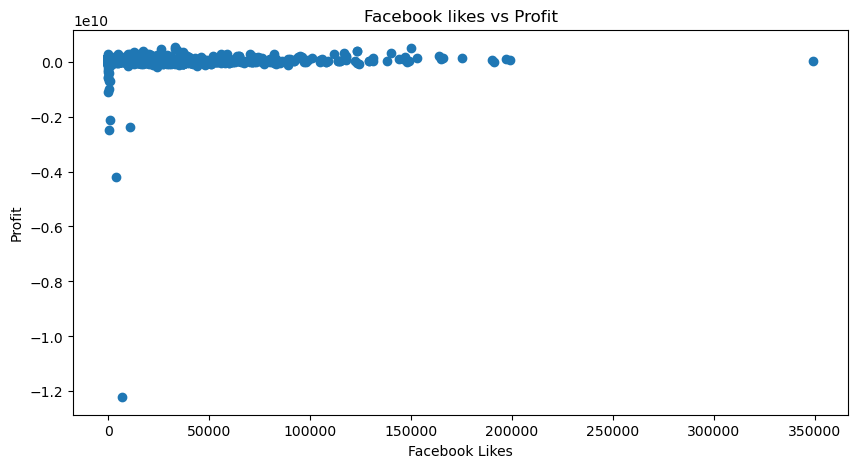

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(subset['movie_facebook_likes'],subset['Profit'])
plt.xlabel('Facebook Likes')
plt.ylabel('Profit')
plt.title('Facebook likes vs Profit')
plt.show()

In [84]:
#Let's use a funcftion for find more correlation from the 'df' table
#df.corr() #(Error because some columns could not be converted into float value)
#Let's drop some columns
#df = df.drop('actor_2_name', axis =1) #already ran, same with the color column
df.head()
#df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Star Power
0,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,2791.0
1,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,46563.0
2,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,11554.0
3,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,95000.0
5,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,2277.0


In [140]:
#Selecting all columns with numeric values
#df.drop(['genres','actor_1_name','movie_title','language','country','content_rating',], axis=1, inplace=True)
df.head(1)
#Perfect!

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0


In [130]:
#df.drop(['actor_3_name','plot_keywords','movie_imdb_link'], axis=1, inplace=True)

In [132]:
df_numeric = df # Differentaite between the original df from earlier and the numeric table where we will run the df.corr() function to find correlations

In [150]:
df_numeric.drop(['actor_2_name'],axis=1,inplace=True)
df_numeric.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0


In [152]:
df_numeric.drop(['genres'],axis=1,inplace=True)

In [156]:
#df_numeric.drop(['actor_3_name','plot_keywords','movie_imdb_link'],axis=1,inplace=True)
#df_numeric.drop(['actor_3_name','plot_keywords','movie_imdb_link'],axis=1,inplace=True)
df_numeric_corr = df_numeric.corr()
#df_numeric_corr.sort_values('Profit', ascending=False)
#df_numeric.shape (3891,17)

In [158]:
df_numeric_corr

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
num_critic_for_reviews,1.000000,0.239282,0.179252,0.256934,0.172216,0.477022,0.600473,0.243990,-0.033828,0.573610,0.107666,0.392422,0.258969,0.340219,0.181808,0.703414,0.041345
duration,0.239282,1.000000,0.180797,0.127678,0.087185,0.252781,0.344151,0.124478,0.032307,0.356218,0.069574,-0.128198,0.131826,0.358253,0.154932,0.221718,0.009599
director_facebook_likes,0.179252,0.180797,1.000000,0.119413,0.091590,0.142158,0.301847,0.121031,-0.047202,0.220459,0.019235,-0.045781,0.118357,0.189293,0.038173,0.162555,0.024960
actor_3_facebook_likes,0.256934,0.127678,0.119413,1.000000,0.253884,0.303080,0.271188,0.490246,0.104290,0.209776,0.041219,0.112255,0.554580,0.064991,0.047161,0.271943,0.052960
actor_1_facebook_likes,0.172216,0.087185,0.091590,0.253884,1.000000,0.148880,0.183599,0.945227,0.064623,0.127462,0.017544,0.091297,0.392058,0.091960,0.058401,0.131591,0.028688
gross,0.477022,0.252781,0.142158,0.303080,0.148880,1.000000,0.631404,0.240982,-0.030618,0.552499,0.102179,0.046575,0.256579,0.211525,0.066456,0.375455,0.208148
num_voted_users,0.600473,0.344151,0.301847,0.271188,0.183599,0.631404,1.000000,0.254050,-0.031936,0.782493,0.068834,0.016773,0.248970,0.473209,0.086580,0.522649,0.127181
cast_total_facebook_likes,0.243990,0.124478,0.121031,0.490246,0.945227,0.240982,0.254050,1.000000,0.086973,0.185527,0.030189,0.120310,0.642958,0.104546,0.070671,0.206783,0.044688
facenumber_in_poster,-0.033828,0.032307,-0.047202,0.104290,0.064623,-0.030618,-0.031936,0.086973,1.000000,-0.078663,-0.021967,0.070279,0.072989,-0.067941,0.017088,0.015792,0.012166
num_user_for_reviews,0.573610,0.356218,0.220459,0.209776,0.127462,0.552499,0.782493,0.185527,-0.078663,1.000000,0.073352,0.011868,0.192746,0.320005,0.099637,0.376885,0.098387


**Let's do some feature engineering; Basically combining existing data into newer data to extract more insights.**

In [71]:
df_numeric['Star Power'] = (df_numeric['actor_3_facebook_likes']+ df_numeric['actor_1_facebook_likes'] + df_numeric['director_facebook_likes'] + df_numeric['actor_2_facebook_likes'])

In [73]:
df_numeric.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Star Power
0,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,2791.0
1,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,46563.0
2,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,11554.0
3,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,95000.0
5,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,2277.0


**Nice, so now let's run the 'corr' function again to see if we have can have a better understanding of what's happening here between the shared amount of likes and profits.**

In [160]:
df_numeric.sort_values('Profit', ascending=False)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,2.370000e+08,2009.0,936.0,7.9,1.78,33000,5.235058e+08
29,644.0,124.0,365.0,1000.0,3000.0,652177271.0,418214,8458,0.0,1290.0,1.500000e+08,2015.0,2000.0,7.0,2.00,150000,5.021773e+08
26,315.0,194.0,0.0,794.0,29000.0,658672302.0,793059,45223,0.0,2528.0,2.000000e+08,1997.0,14000.0,7.7,2.35,26000,4.586723e+08
3024,282.0,125.0,0.0,504.0,11000.0,460935665.0,911097,13485,1.0,1470.0,1.100000e+07,1977.0,1000.0,8.7,2.35,33000,4.499357e+08
3080,215.0,120.0,14000.0,548.0,861.0,434949459.0,281842,2811,0.0,515.0,1.050000e+07,1982.0,725.0,7.9,1.85,34000,4.244495e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,105.0,103.0,78.0,101.0,488.0,410388.0,13727,991,1.0,79.0,2.127520e+09,2004.0,336.0,6.9,1.85,973,-2.127110e+09
2323,174.0,134.0,6000.0,745.0,893.0,2298191.0,221552,2710,0.0,570.0,2.400000e+09,1997.0,851.0,8.4,1.85,11000,-2.397702e+09
3005,73.0,134.0,45.0,0.0,9.0,195888.0,5603,11,0.0,45.0,2.500000e+09,2005.0,2.0,7.1,2.35,607,-2.499804e+09
3859,202.0,112.0,0.0,38.0,717.0,211667.0,53508,907,0.0,131.0,4.200000e+09,2005.0,126.0,7.7,2.35,4000,-4.199788e+09


In [162]:
#Let's put the "profit" column on the left side of the table for better readability
df_numeric = df_numeric[['Profit'] + [col for col in df_numeric.columns if col !='Profit']]
df_numeric.head()

,Profit,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,523505847.0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,9404152.0,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,-44925825.0,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,198130642.0,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,-190641321.0,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [164]:
df_numeric.corr() #Nice!

,Profit,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Profit,1.000000,0.041345,0.009599,0.024960,0.052960,0.028688,0.208148,0.127181,0.044688,0.012166,0.098387,-0.951709,-0.029862,0.042841,0.036634,-0.005242,0.062092
num_critic_for_reviews,0.041345,1.000000,0.239282,0.179252,0.256934,0.172216,0.477022,0.600473,0.243990,-0.033828,0.573610,0.107666,0.392422,0.258969,0.340219,0.181808,0.703414
duration,0.009599,0.239282,1.000000,0.180797,0.127678,0.087185,0.252781,0.344151,0.124478,0.032307,0.356218,0.069574,-0.128198,0.131826,0.358253,0.154932,0.221718
director_facebook_likes,0.024960,0.179252,0.180797,1.000000,0.119413,0.091590,0.142158,0.301847,0.121031,-0.047202,0.220459,0.019235,-0.045781,0.118357,0.189293,0.038173,0.162555
actor_3_facebook_likes,0.052960,0.256934,0.127678,0.119413,1.000000,0.253884,0.303080,0.271188,0.490246,0.104290,0.209776,0.041219,0.112255,0.554580,0.064991,0.047161,0.271943
actor_1_facebook_likes,0.028688,0.172216,0.087185,0.091590,0.253884,1.000000,0.148880,0.183599,0.945227,0.064623,0.127462,0.017544,0.091297,0.392058,0.091960,0.058401,0.131591
gross,0.208148,0.477022,0.252781,0.142158,0.303080,0.148880,1.000000,0.631404,0.240982,-0.030618,0.552499,0.102179,0.046575,0.256579,0.211525,0.066456,0.375455
num_voted_users,0.127181,0.600473,0.344151,0.301847,0.271188,0.183599,0.631404,1.000000,0.254050,-0.031936,0.782493,0.068834,0.016773,0.248970,0.473209,0.086580,0.522649
cast_total_facebook_likes,0.044688,0.243990,0.124478,0.121031,0.490246,0.945227,0.240982,0.254050,1.000000,0.086973,0.185527,0.030189,0.120310,0.642958,0.104546,0.070671,0.206783
facenumber_in_poster,0.012166,-0.033828,0.032307,-0.047202,0.104290,0.064623,-0.030618,-0.031936,0.086973,1.000000,-0.078663,-0.021967,0.070279,0.072989,-0.067941,0.017088,0.015792


In [166]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
count,3890.000000,3890.000000,3891.000000,3881.000000,3888.000000,3.891000e+03,3.891000e+03,3891.000000,3885.000000,3891.000000,3.891000e+03,3891.000000,3886.000000,3891.000000,3816.000000,3891.000000,3.891000e+03
mean,163.234704,109.896401,781.307376,753.534914,7584.675669,5.105500e+07,1.025834e+05,11263.053200,1.379923,327.309946,4.521028e+07,2003.081470,1970.656974,6.463506,2.109751,9138.152660,5.844717e+06
std,124.053735,22.706775,3017.677327,1866.632392,15366.076754,6.980248e+07,1.507162e+05,18925.356084,2.055314,408.006292,2.223895e+08,10.001352,4485.731089,1.056080,0.352416,21302.761999,2.261794e+08
min,1.000000,34.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1920.000000,0.000000,1.600000,1.180000,0.000000,-1.221330e+10
25%,72.250000,95.000000,10.000000,183.000000,721.750000,6.836508e+06,1.731400e+04,1818.000000,0.000000,102.000000,1.000000e+07,1999.000000,363.000000,5.900000,1.850000,0.000000,-1.026518e+07
50%,134.000000,106.000000,58.000000,427.000000,1000.000000,2.797940e+07,5.041500e+04,3888.000000,1.000000,203.000000,2.400000e+07,2005.000000,664.000000,6.600000,2.350000,209.000000,8.516360e+05
75%,221.750000,120.000000,226.000000,687.000000,12000.000000,6.536066e+07,1.242035e+05,16001.500000,2.000000,391.000000,5.000000e+07,2010.000000,971.000000,7.200000,2.350000,11000.000000,2.475147e+07
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000,5.235058e+08


In [168]:
df_numeric.describe()

,Profit,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3.891000e+03,3890.000000,3890.000000,3891.000000,3881.000000,3888.000000,3.891000e+03,3.891000e+03,3891.000000,3885.000000,3891.000000,3.891000e+03,3891.000000,3886.000000,3891.000000,3816.000000,3891.000000
mean,5.844717e+06,163.234704,109.896401,781.307376,753.534914,7584.675669,5.105500e+07,1.025834e+05,11263.053200,1.379923,327.309946,4.521028e+07,2003.081470,1970.656974,6.463506,2.109751,9138.152660
std,2.261794e+08,124.053735,22.706775,3017.677327,1866.632392,15366.076754,6.980248e+07,1.507162e+05,18925.356084,2.055314,408.006292,2.223895e+08,10.001352,4485.731089,1.056080,0.352416,21302.761999
min,-1.221330e+10,1.000000,34.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1920.000000,0.000000,1.600000,1.180000,0.000000
25%,-1.026518e+07,72.250000,95.000000,10.000000,183.000000,721.750000,6.836508e+06,1.731400e+04,1818.000000,0.000000,102.000000,1.000000e+07,1999.000000,363.000000,5.900000,1.850000,0.000000
50%,8.516360e+05,134.000000,106.000000,58.000000,427.000000,1000.000000,2.797940e+07,5.041500e+04,3888.000000,1.000000,203.000000,2.400000e+07,2005.000000,664.000000,6.600000,2.350000,209.000000
75%,2.475147e+07,221.750000,120.000000,226.000000,687.000000,12000.000000,6.536066e+07,1.242035e+05,16001.500000,2.000000,391.000000,5.000000e+07,2010.000000,971.000000,7.200000,2.350000,11000.000000
max,5.235058e+08,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = df.dropna()

In [180]:
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


In [186]:
yearly = df.groupby("title_year").size()

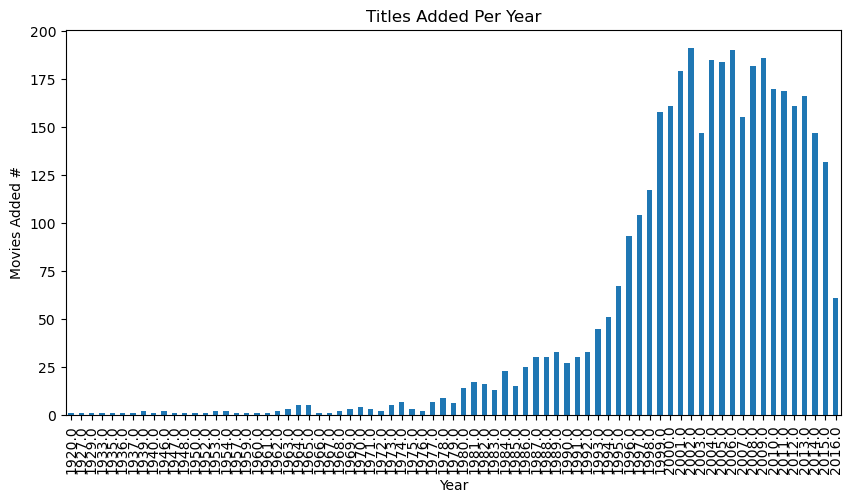

In [190]:
plt.figure(figsize=(10,5))
yearly.plot(kind='bar')
plt.title('Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Movies Added #')
plt.show()

In [222]:
category = subset.groupby('genres').size()
category.sort_values(ascending=False)

genres
Drama                                             154
Comedy|Drama|Romance                              151
Comedy|Drama                                      148
Comedy                                            147
Comedy|Romance                                    136
                                                 ... 
Animation|Drama|Family|Musical|Romance              1
Animation|Drama|Family|Fantasy|Musical|Romance      1
Animation|Drama|Family|Fantasy                      1
Animation|Comedy|Fantasy|Musical                    1
Comedy|Crime|Family|Romance                         1
Length: 762, dtype: int64

In [248]:
category_range = category.dropna()
category_range.sort_values(ascending=True)
genre_popularity = category_range.head(10)

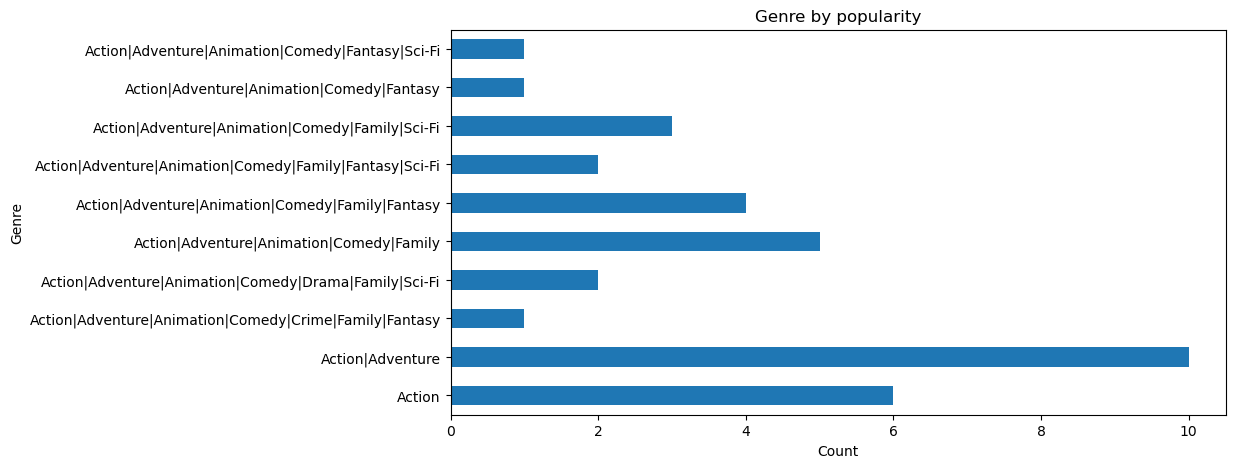

In [250]:
plt.figure(figsize=(10,5))
genre_popularity.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Genre by popularity')
plt.show()